In [1]:
#Importing Libraries
import pandas as pd
import random
import pickle
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D, InputLayer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder
import random 

random.seed(19)

In [2]:
pickle_in = open('X.pickle',"rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y.pickle',"rb")
y = pickle.load(pickle_in)
pickle_in.close()

In [3]:
X.shape[1:]

(64, 64, 1)

## Creating a model to be trained on gray-scaled, unnormalised data

In [4]:
# Define the model
model = Sequential()

# Add InputLayer with input shape
model.add(InputLayer(shape=X.shape[1:]))

# 1st Convolutional Layer
model.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(128, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,344 (825.56 KB)

 Trainable params: 211,344 (825.56 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.10, batch_size=32) 

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.0563 - loss: 6.3528 - val_accuracy: 0.2305 - val_loss: 2.9124
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.2509 - loss: 2.7897 - val_accuracy: 0.7110 - val_loss: 1.3259
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.5684 - loss: 1.6083 - val_accuracy: 0.7792 - val_loss: 0.9857
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.6947 - loss: 1.0827 - val_accuracy: 0.8799 - val_loss: 0.4997
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.7629 - loss: 0.7770 - val_accuracy: 0.8799 - val_loss: 0.4233
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.8313 - loss: 0.6182 - val_accuracy: 0.9058 - val_loss: 0.3273
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8454 - loss: 0.5287 - val_accuracy: 0.9091 - val_loss: 0.3020
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.8619 - loss: 0.4453 - val_accuracy: 0.9188 - v

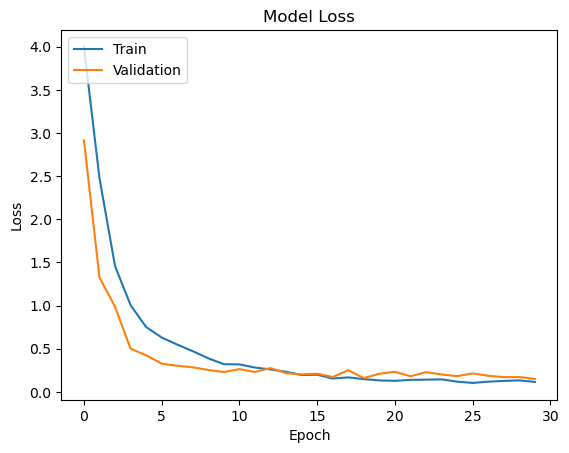

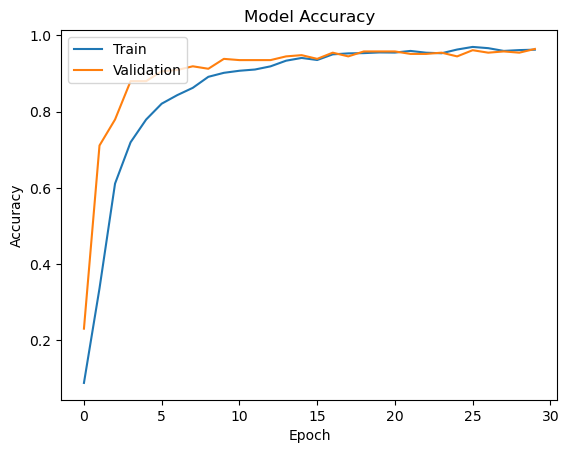

In [6]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
pickle_in = open('X_test.pickle',"rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test.pickle',"rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [8]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5647 - loss: 2.3872
Test Loss: 2.2607367038726807
Test Accuracy: 0.5795454382896423


### Training the same Model on Normalised, gray-scaled Images

Using simple rescaling of Images.

This method involves rescaling pixel values to a new range, typically between 0 and 1. By dividing each pixel by the maximum possible value (usually 255), we can achieve this form of normalization which helps in scaling down the pixel intensity for various computing purposes.

In [9]:
X = X/255.0
X

array([[[[0.18823529],
         [0.18039216],
         [0.18823529],
         ...,
         [0.16078431],
         [0.17647059],
         [0.20392157]],

        [[0.18823529],
         [0.17254902],
         [0.16862745],
         ...,
         [0.23137255],
         [0.23137255],
         [0.23529412]],

        [[0.14509804],
         [0.10980392],
         [0.11372549],
         ...,
         [0.21568627],
         [0.22352941],
         [0.23137255]],

        ...,

        [[0.25882353],
         [0.21960784],
         [0.30196078],
         ...,
         [0.22352941],
         [0.23921569],
         [0.21176471]],

        [[0.2627451 ],
         [0.20784314],
         [0.21960784],
         ...,
         [0.21960784],
         [0.25098039],
         [0.25098039]],

        [[0.26666667],
         [0.21960784],
         [0.2       ],
         ...,
         [0.24313725],
         [0.24313725],
         [0.23921569]]],


       [[[0.24705882],
         [0.76078431],
         [0.73

In [10]:
X_test = X_test/255.0
X_test

array([[[[0.64313725],
         [0.64313725],
         [0.63921569],
         ...,
         [0.30588235],
         [0.34901961],
         [0.56470588]],

        [[0.64313725],
         [0.64313725],
         [0.64705882],
         ...,
         [0.31764706],
         [0.3372549 ],
         [0.55686275]],

        [[0.63921569],
         [0.64313725],
         [0.64313725],
         ...,
         [0.31764706],
         [0.32156863],
         [0.54509804]],

        ...,

        [[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.29019608],
         [0.10196078],
         [0.16470588]],

        [[0.09411765],
         [0.09019608],
         [0.08627451],
         ...,
         [0.2745098 ],
         [0.11764706],
         [0.16078431]],

        [[0.09411765],
         [0.08627451],
         [0.09411765],
         ...,
         [0.23921569],
         [0.11372549],
         [0.1372549 ]]],


       [[[0.17254902],
         [0.17254902],
         [0.17

In [11]:
# Define the model
model = Sequential()

# Add InputLayer with input shape
model.add(InputLayer(shape=X.shape[1:]))

# 1st Convolutional Layer
model.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(128, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(32, activation='softmax'))

# Compile the model
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,344 (825.56 KB)

 Trainable params: 211,344 (825.56 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(X, y, epochs=30, validation_split=0.10, batch_size=32) 

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.0541 - loss: 3.3954 - val_accuracy: 0.1006 - val_loss: 3.2221
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.2313 - loss: 2.8397 - val_accuracy: 0.7825 - val_loss: 0.9374
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.6817 - loss: 1.1530 - val_accuracy: 0.8864 - val_loss: 0.4873
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8145 - loss: 0.6945 - val_accuracy: 0.9318 - val_loss: 0.2821
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.8673 - loss: 0.4591 - val_accuracy: 0.9253 - val_loss: 0.2483
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8847 - loss: 0.3860 - val_accuracy: 0.9513 - val_loss: 0.1961
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9187 - loss: 0.2697 - val_accuracy: 0.9545 - val_loss: 0.1733
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9393 - loss: 0.2125 - val_accuracy: 0.9578 - v

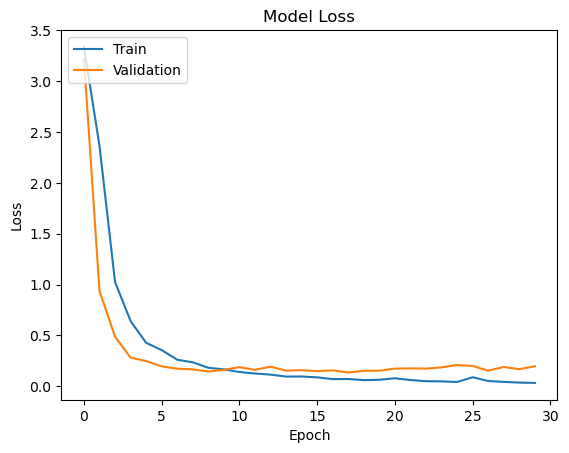

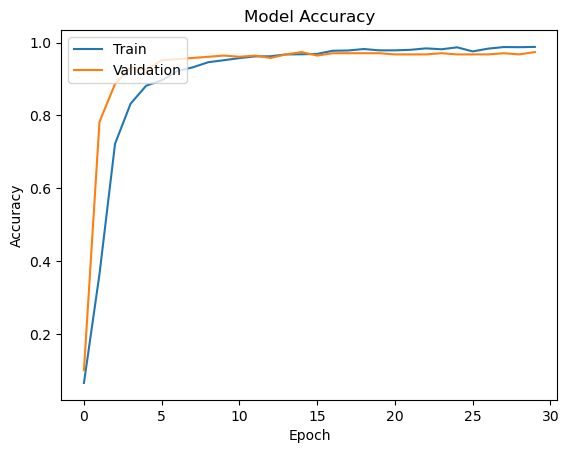

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
pickle_in = open('X_test.pickle',"rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test.pickle',"rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [15]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7107 - loss: 338.1926
Test Loss: 343.5689392089844
Test Accuracy: 0.6988636255264282


### Colored, normalised Image data.

In [16]:
pickle_in = open('X_color.pickle',"rb")
X_color = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_color.pickle',"rb")
y_color = pickle.load(pickle_in)
pickle_in.close()

In [17]:
pickle_in = open('X_test_color.pickle',"rb")
X_test_color = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open('y_test_color.pickle',"rb")
y_test_color = pickle.load(pickle_in)
pickle_in.close()

In [18]:
X_color.shape[1:]

(64, 64, 3)

In [19]:
X_color = X_color/255.0
X_color

array([[[[0.17254902, 0.19215686, 0.21568627],
         [0.16862745, 0.18039216, 0.20784314],
         [0.17647059, 0.18823529, 0.21176471],
         ...,
         [0.1372549 , 0.16470588, 0.18823529],
         [0.15294118, 0.18039216, 0.20392157],
         [0.18039216, 0.21176471, 0.23529412]],

        [[0.17254902, 0.18823529, 0.21568627],
         [0.16078431, 0.17254902, 0.2       ],
         [0.15686275, 0.16862745, 0.2       ],
         ...,
         [0.20392157, 0.23921569, 0.25490196],
         [0.20392157, 0.23921569, 0.25490196],
         [0.21176471, 0.24313725, 0.25882353]],

        [[0.13333333, 0.14509804, 0.17254902],
         [0.09803922, 0.10980392, 0.1372549 ],
         [0.10196078, 0.11372549, 0.14117647],
         ...,
         [0.18823529, 0.22745098, 0.23529412],
         [0.19607843, 0.23529412, 0.24313725],
         [0.20392157, 0.24313725, 0.25098039]],

        ...,

        [[0.23529412, 0.26666667, 0.27843137],
         [0.19215686, 0.23529412, 0.23921569]

In [20]:
X_test_color = X_test_color/255.0
X_test_color

array([[[[0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         [0.62352941, 0.64313725, 0.65490196],
         ...,
         [0.28235294, 0.30980392, 0.34117647],
         [0.3372549 , 0.34901961, 0.37647059],
         [0.56078431, 0.56470588, 0.58039216]],

        [[0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         [0.63137255, 0.65098039, 0.6627451 ],
         ...,
         [0.29019608, 0.3254902 , 0.35686275],
         [0.32941176, 0.3372549 , 0.36078431],
         [0.54901961, 0.55686275, 0.57254902]],

        [[0.62352941, 0.64313725, 0.65490196],
         [0.62745098, 0.64705882, 0.65882353],
         [0.62745098, 0.64705882, 0.65882353],
         ...,
         [0.29019608, 0.3254902 , 0.36078431],
         [0.30980392, 0.3254902 , 0.34117647],
         [0.52941176, 0.54901961, 0.56470588]],

        ...,

        [[0.0745098 , 0.09411765, 0.09019608],
         [0.05882353, 0.10196078, 0.09019608]

In [21]:
# Define the color model
model_color = Sequential()

# Add InputLayer with input shape
model_color.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_color.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_color.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_color.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_color.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_color.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_color.add(Flatten())

# Fully Connected Dense Layer
model_color.add(Dense(128, activation='relu'))

# Dropout Layer
model_color.add(Dropout(0.5))

# Output Layer
model_color.add(Dense(32, activation='softmax'))


# Compile the model
model_color.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_color.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,440 (841.56 KB)

 Trainable params: 215,440 (841.56 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model_color.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.0906 - loss: 3.2980 - val_accuracy: 0.4286 - val_loss: 2.1747
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.4635 - loss: 1.9397 - val_accuracy: 0.8734 - val_loss: 0.5807
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.7311 - loss: 0.8783 - val_accuracy: 0.8896 - val_loss: 0.4056
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8386 - loss: 0.6142 - val_accuracy: 0.9416 - val_loss: 0.2066
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8837 - loss: 0.3814 - val_accuracy: 0.9610 - val_loss: 0.1769
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.8986 - loss: 0.3375 - val_accuracy: 0.9773 - val_loss: 0.1125
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.9180 - loss: 0.2548 - val_accuracy: 0.9708 - val_loss: 0.1084
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.9271 - loss: 0.2464 - val_accuracy: 0.9578 - v

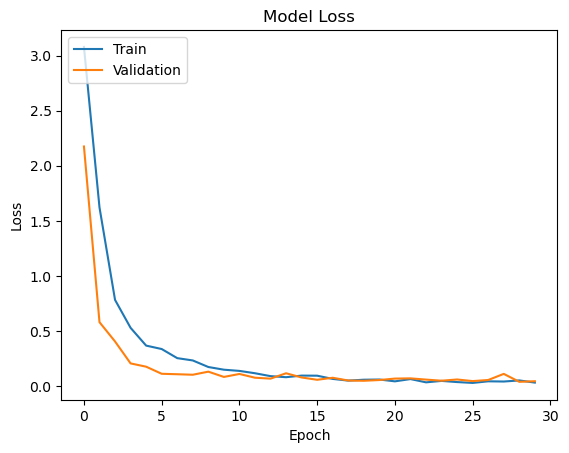

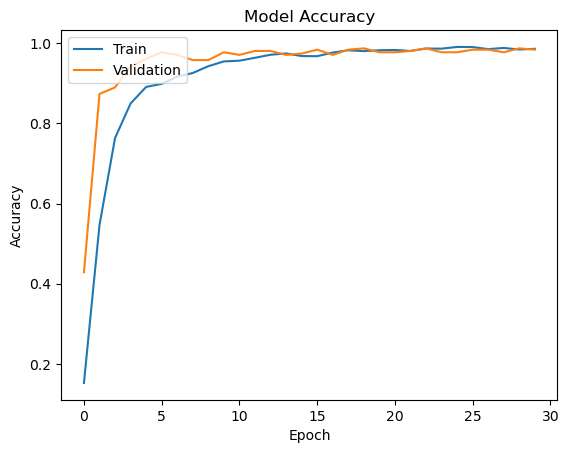

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
# Evaluate the model on the test dataset
loss, accuracy = model_color.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7967 - loss: 1.1558
Test Loss: 1.0883619785308838
Test Accuracy: 0.8181818127632141


### Imrpoving performance with different optimisers

In [25]:
# Define the color model
model_SGD = Sequential()

# Add InputLayer with input shape
model_SGD.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_SGD.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_SGD.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_SGD.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_SGD.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_SGD.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_SGD.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_SGD.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_SGD.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_SGD.add(Flatten())

# Fully Connected Dense Layer
model_SGD.add(Dense(128, activation='relu'))

# Dropout Layer
model_SGD.add(Dropout(0.5))

# Output Layer
model_SGD.add(Dense(32, activation='softmax'))

# Compile the model
model_SGD.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_SGD.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,440 (841.56 KB)

 Trainable params: 215,440 (841.56 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
history = model_SGD.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.0592 - loss: 3.4426 - val_accuracy: 0.1396 - val_loss: 3.3193
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.1500 - loss: 3.1035 - val_accuracy: 0.5065 - val_loss: 2.1008
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.4663 - loss: 1.9125 - val_accuracy: 0.7208 - val_loss: 0.9087
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.6792 - loss: 1.0773 - val_accuracy: 0.8247 - val_loss: 0.5008
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.7412 - loss: 0.8267 - val_accuracy: 0.8377 - val_loss: 0.5353
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.7632 - loss: 0.6992 - val_accuracy: 0.8961 - val_loss: 0.2971
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8368 - loss: 0.5386 - val_accuracy: 0.8929 - val_loss: 0.2680
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8615 - loss: 0.4269 - val_accuracy: 0.9123 - v

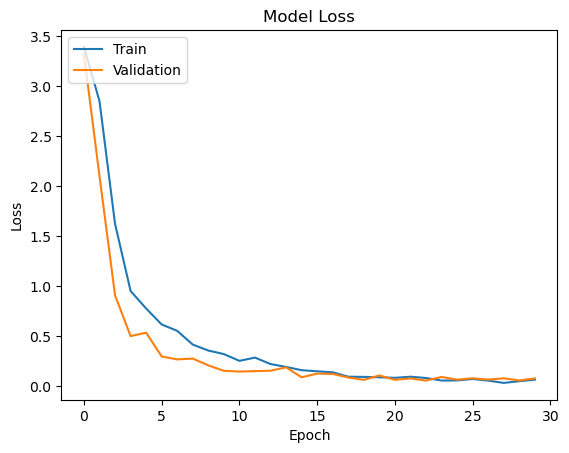

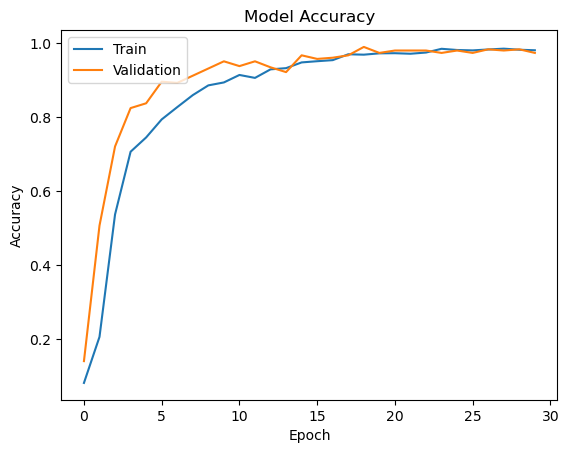

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
# Evaluate the model on the test dataset
loss, accuracy = model_SGD.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7208 - loss: 1.6347
Test Loss: 1.4081426858901978
Test Accuracy: 0.7329545617103577


## RMSPROP Optimiser

In [29]:
# Define the color model
model_RMS = Sequential()

# Add InputLayer with input shape
model_RMS.add(InputLayer(shape=X_color.shape[1:]))

# 1st Convolutional Layer
model_RMS.add(Conv2D(128, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_RMS.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_RMS.add(Conv2D(64, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_RMS.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_RMS.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_RMS.add(MaxPool2D(pool_size=(2, 2)))

# 4th Convolutional Layer
model_RMS.add(Conv2D(16, (4, 4), padding='same', activation='relu'))

# Max Pooling Layer
model_RMS.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model_RMS.add(Flatten())

# Fully Connected Dense Layer
model_RMS.add(Dense(128, activation='relu'))

# Dropout Layer
model_RMS.add(Dropout(0.5))

# Output Layer
model_RMS.add(Dense(32, activation='softmax'))

# Compile the model
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_RMS.compile(optimizer= 'rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_RMS.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 128)    │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,440 (841.56 KB)

 Trainable params: 215,440 (841.56 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = model_RMS.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.0753 - loss: 3.3676 - val_accuracy: 0.2695 - val_loss: 2.6068
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.2983 - loss: 2.5071 - val_accuracy: 0.6461 - val_loss: 1.5007
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.5728 - loss: 1.5919 - val_accuracy: 0.7890 - val_loss: 0.7896
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.6959 - loss: 1.0595 - val_accuracy: 0.8571 - val_loss: 0.4876
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.7626 - loss: 0.7746 - val_accuracy: 0.9026 - val_loss: 0.3887
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8075 - loss: 0.6223 - val_accuracy: 0.9123 - val_loss: 0.2969
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8600 - loss: 0.4550 - val_accuracy: 0.9188 - val_loss: 0.3006
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8707 - loss: 0.4005 - val_accuracy: 0.9351 - v

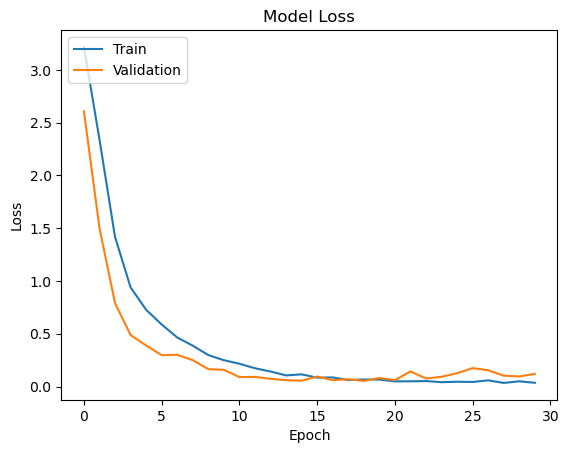

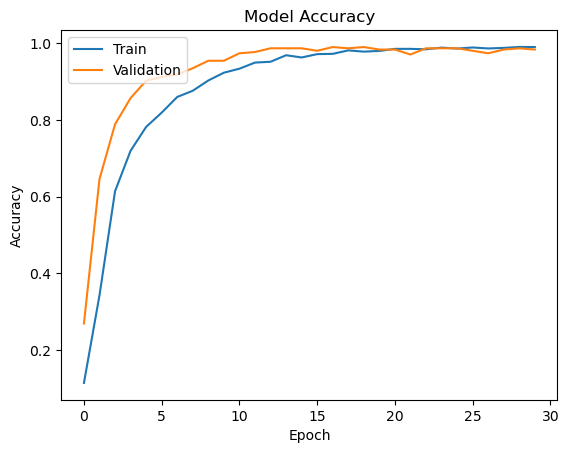

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
# Evaluate the model on the test dataset
loss, accuracy = model_RMS.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7817 - loss: 1.9083
Test Loss: 2.0258629322052
Test Accuracy: 0.78125


### Transfer Learning using Adam Optimizer

In [33]:
# Add an InputLayer to explicitly define the input shape
input_layer = InputLayer(input_shape=X_color.shape[1:])

# Load pre-trained MobileNetV2 model without top (fully connected) layers
base_model = VGG16(input_shape=X_color.shape[1:], include_top=False, weights='imagenet')

# Set base model layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Define output layer with 32 units for 32 labels
output_layer = Dense(32, activation='softmax')

# Add output layer on top of MobileNetV2
model_transfer = tf.keras.Sequential([
    input_layer,  # InputLayer
    base_model, # Include MobileNetV2 as base model
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    output_layer  # Add output layer directly
])

# Compile the model
model_transfer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_transfer.summary()

C:\Users\hein_\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,981,088 (57.15 MB)

 Trainable params: 266,400 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [34]:
# Train the model
history = model_transfer.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.3731 - loss: 2.4471 - val_accuracy: 0.8701 - val_loss: 0.5868
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.8188 - loss: 0.7254 - val_accuracy: 0.9188 - val_loss: 0.3265
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - accuracy: 0.8677 - loss: 0.4510 - val_accuracy: 0.9416 - val_loss: 0.2187
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.8993 - loss: 0.3403 - val_accuracy: 0.9383 - val_loss: 0.1829
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - accuracy: 0.9097 - loss: 0.2829 - val_accuracy: 0.9416 - val_loss: 0.1652
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.9253 - loss: 0.2304 - val_accuracy: 0.9643 - val_loss: 0.1409
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.9496 - loss: 0.1941 - val_accuracy: 0.9740 - val_loss: 0.1178
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.9476 - loss: 0.1840 - val_accu

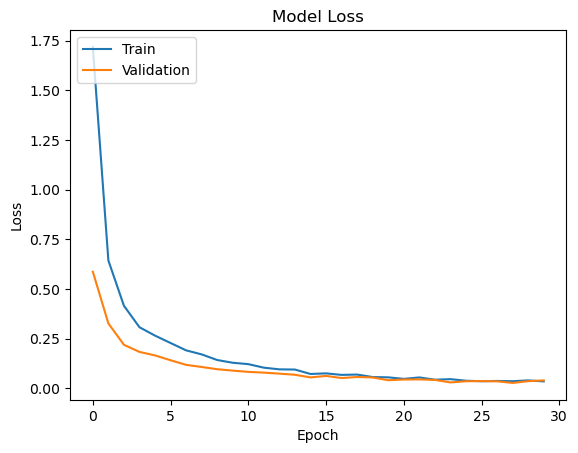

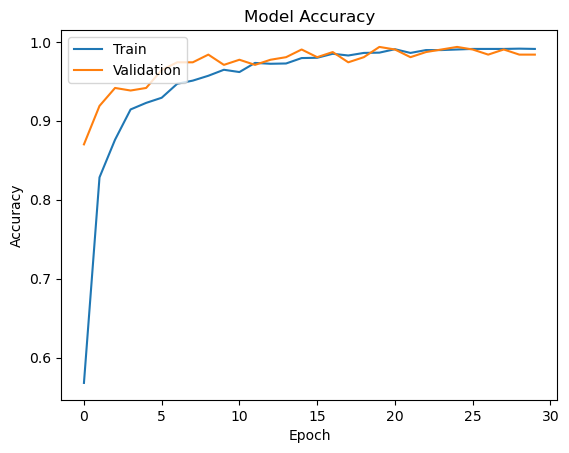

In [35]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
# Evaluate the model on the test dataset
loss, accuracy = model_transfer.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8394 - loss: 0.4409
Test Loss: 0.45077791810035706
Test Accuracy: 0.8494318127632141


### Transfer learning with RMSProp Optimizer

In [37]:
# Add an InputLayer to explicitly define the input shape
input_layer = InputLayer(input_shape=X_color.shape[1:])

# Load pre-trained MobileNetV2 model without top (fully connected) layers
base_model = VGG16(input_shape=X_color.shape[1:], include_top=False, weights='imagenet')

# Set base model layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Define output layer with 32 units for 32 labels
output_layer = Dense(32, activation='softmax')

# Add output layer on top of MobileNetV2
model_transfer_rms = tf.keras.Sequential([
    input_layer,  # InputLayer
    base_model, # Include MobileNetV2 as base model
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    output_layer  # Add output layer directly
])

# Compile the model
model_transfer_rms.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_transfer_rms.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,981,088 (57.15 MB)

 Trainable params: 266,400 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
# Train the model
history = model_transfer_rms.fit(X_color, y_color, epochs=30, validation_split=0.10,batch_size=32) 

Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.4325 - loss: 2.2650 - val_accuracy: 0.8799 - val_loss: 0.6196
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.8095 - loss: 0.7428 - val_accuracy: 0.8896 - val_loss: 0.3435
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.8651 - loss: 0.4442 - val_accuracy: 0.9383 - val_loss: 0.2315
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.9001 - loss: 0.3259 - val_accuracy: 0.9481 - val_loss: 0.1915
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.9261 - loss: 0.2497 - val_accuracy: 0.9708 - val_loss: 0.1423
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.9381 - loss: 0.2193 - val_accuracy: 0.9416 - val_loss: 0.1616
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.9428 - loss: 0.1733 - val_accuracy: 0.9675 - val_loss: 0.1086
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.9534 - loss: 0.1610 - val_accu

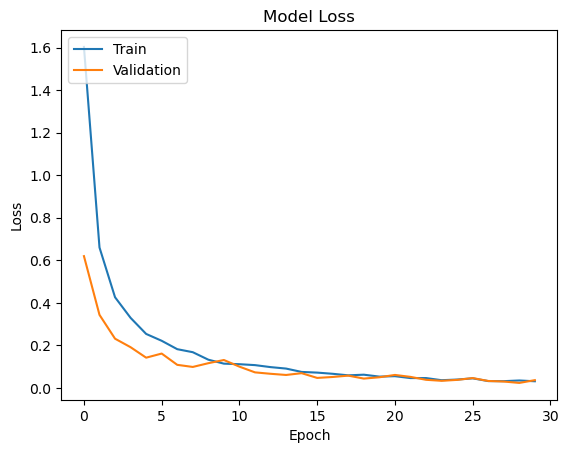

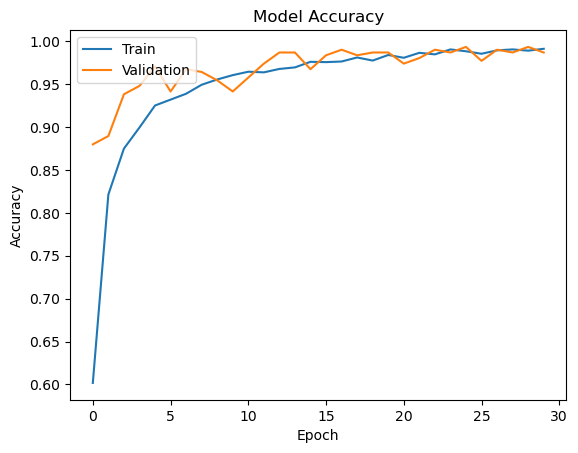

In [39]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
# Evaluate the model on the test dataset
loss, accuracy = model_transfer_rms.evaluate(X_test_color, y_test_color)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.8559 - loss: 0.4887
Test Loss: 0.4770212173461914
Test Accuracy: 0.8551136255264282


## Saving the models

In [41]:
model_color.save('Adam_Model.keras')
model_RMS.save('RMS_Model.keras')

In [50]:
model_transfer.save('VGG16_adam.keras')

In [48]:
model_transfer_rms.save('VGG16_RMS.keras')